# Analyse des tendances youtube en France
Source [kaggle.com](https://www.kaggle.com/rsrishav/youtube-trending-video-dataset?select=FR_category_id.json)

**Objectif**: quelle catégorie de vidéo devrait choisir un nouveau youtubeur

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('FR_youtube_trending_data.csv')
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11T16:00:31Z,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12T00:00:00Z,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11T10:55:22Z,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12T00:00:00Z,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12T10:00:11Z,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12T00:00:00Z,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv..."
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11T16:00:08Z,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,23,2020-08-12T00:00:00Z,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ..."
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12T08:00:05Z,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,24,2020-08-12T00:00:00Z,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19197 entries, 0 to 19196
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           19197 non-null  object
 1   title              19197 non-null  object
 2   publishedAt        19197 non-null  object
 3   channelId          19197 non-null  object
 4   channelTitle       19197 non-null  object
 5   categoryId         19197 non-null  int64 
 6   trending_date      19197 non-null  object
 7   tags               19197 non-null  object
 8   view_count         19197 non-null  int64 
 9   likes              19197 non-null  int64 
 10  dislikes           19197 non-null  int64 
 11  comment_count      19197 non-null  int64 
 12  thumbnail_link     19197 non-null  object
 13  comments_disabled  19197 non-null  bool  
 14  ratings_disabled   19197 non-null  bool  
 15  description        19059 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

### Netoyage des données

In [4]:
data.isnull().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          138
dtype: int64

In [5]:
data = data.fillna('')
data.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

### Conversion des dates

In [6]:
data.publishedAt = pd.to_datetime(data['publishedAt'])
data.trending_date = pd.to_datetime(data['trending_date'])

### Ajout de la colonne catégorie

In [7]:
categoriesJson = pd.read_json('FR_category_id.json')
categoriesJson = categoriesJson['items'].items()

categories = {}

for index, value in categoriesJson:
    categories[int(value['id'])] = value['snippet']['title']
    
data['category'] = data.categoryId.map(categories)

In [8]:
data = data.dropna(how='any')

### Creation des colonnes likesPercent et dislikesPercent correspondant au pourcentage de likes/dislikes par rapport au nombre de vues de la vidéo, ainsi que commentCountPercent dans la même logique

In [9]:
data = data.assign( likesPercent = (data.likes / data.view_count * 100 ) )
data = data = data.assign( dislikesPercent = (data.dislikes / data.view_count * 100 ) )
data = data = data.assign( commentCountPercent = (data.comment_count / data.view_count * 100 ) )

## Analyse

### Répartition des vidéos par catégories

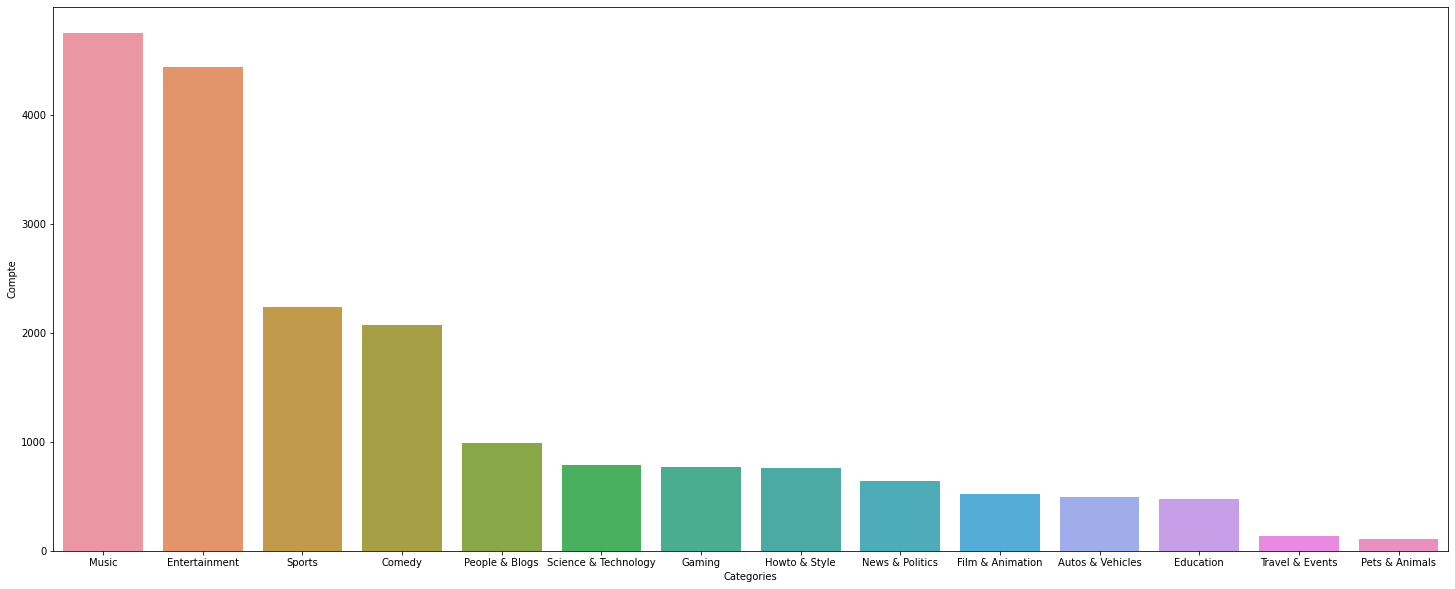

In [10]:
plt.figure(figsize=(25,10))
sns.countplot(x = 'category', data = data, order = data['category'].value_counts().index); 
plt.xlabel('Categories')
plt.ylabel('Compte');

Sur le youtube Français, les catégories les plus présentent sont **Music** et **Entertainment**. Viennent ensuite **Sports** et **Comedy**.

### Nombre de vues par catégories

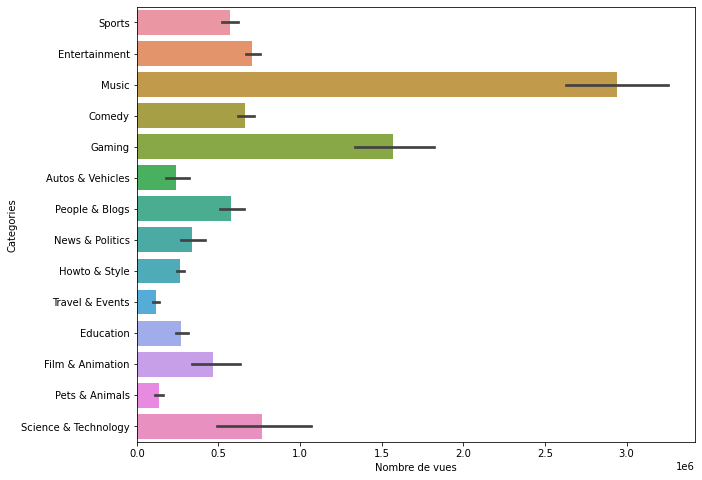

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'view_count', y = 'category', data = data);
plt.ylabel('Categories')
plt.xlabel('Nombre de vues');

La catégorie **Music** génère le plus de vues. Viens ensuite le **Gaming**, les **Science & Technology**, l'**Entertainment**, les **Comedy**, le **Sports** et **People and Blog**.

### Les catégories créants le plus d'engagement

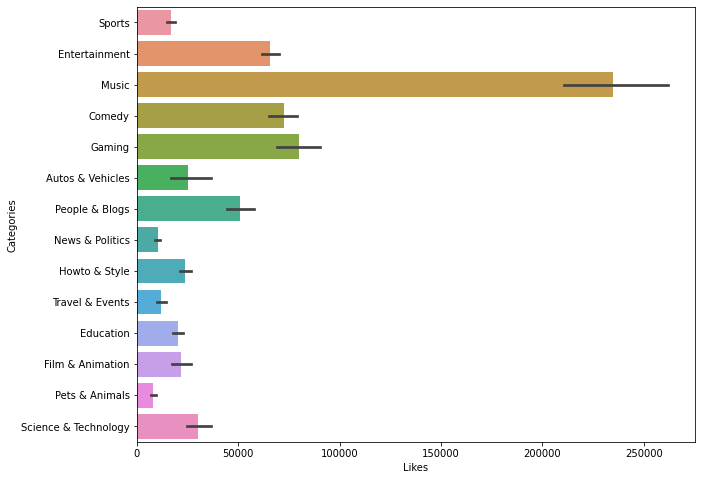

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'likes', y = 'category', data = data);
plt.ylabel('Categories')
plt.xlabel('Likes');

**Music** est largement en tête. Il génère beaucoup plus de likes que les autres. Ceci dit, c'est aussi la catégorie possédant le plus de vidéos et le plus grand nombre de vues. Pour mesurer le taux likes d'une catégorie, mieux vaut utiliser le pourcentage de likes par rapport au nombre de vues.

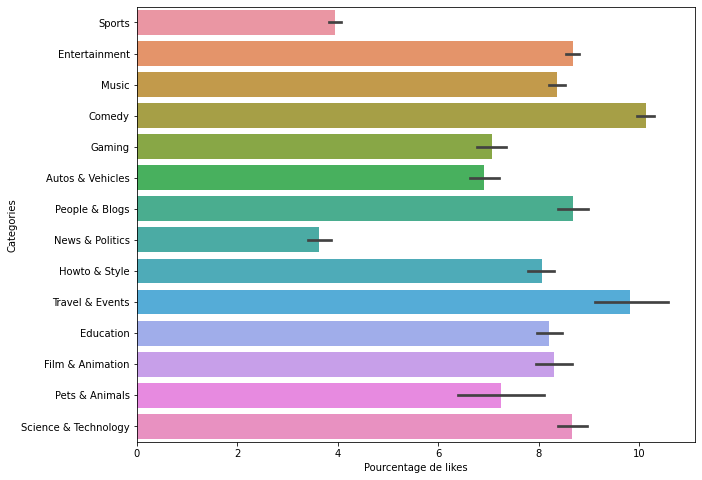

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'likesPercent', y = 'category', data = data);
plt.ylabel('Categories')
plt.xlabel('Pourcentage de likes');

En considérant le like comme une "validation", un moyen pour le viewer de consolider la communauté du youtubeur, les catégories **Comedy** et **Travel & Events** sont les plus à même de créer de l'engagement. **Science & Technology**, **People & Blogs** **Entertainment** et **Music** dans une moindre mesure.

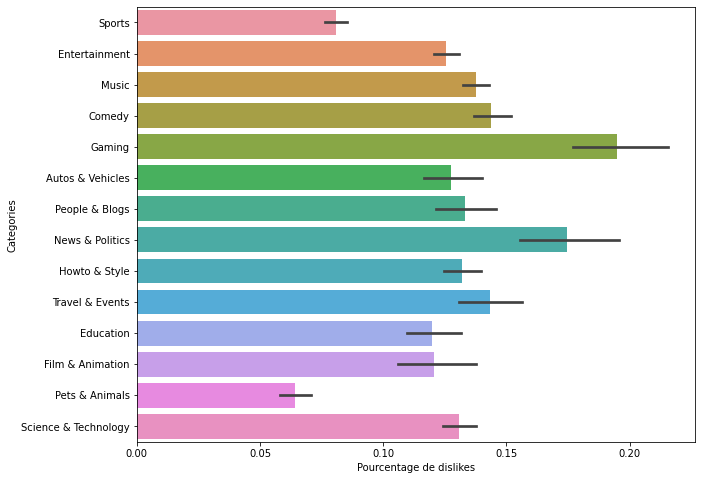

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'dislikesPercent', y = 'category', data = data)
plt.ylabel('Categories')
plt.xlabel('Pourcentage de dislikes');

**Gaming** et **News & Politics** sont les deux catégories générants le plus de disliques, signifiant une certaine amertume de la part du viewer. En tant que youtubeur/créateur de contenu, l'idée est d'avoir le meilleur ratio likes/dislikes.

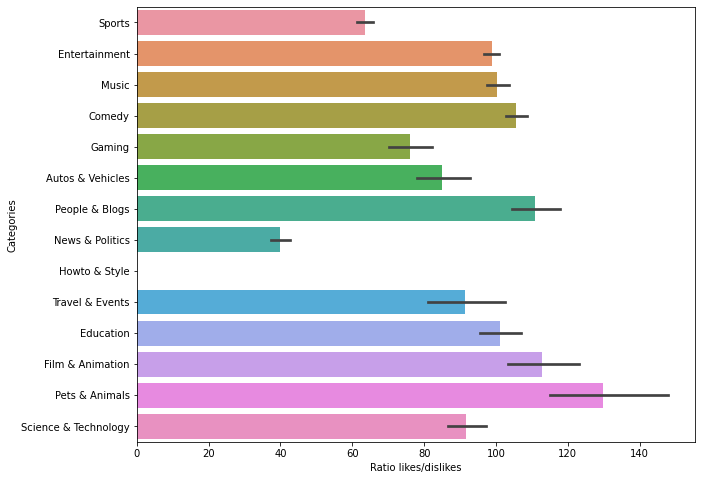

In [15]:
data = data.assign( likesDislikesRatio = (data.likes / data.dislikes) )
plt.figure(figsize=(10,8))
sns.barplot(x = 'likesDislikesRatio', y = 'category', data = data)
plt.ylabel('Categories')
plt.xlabel('Ratio likes/dislikes');

Les catégories possédant le meilleur ratio like/dislikes sont donc **Pets & Animals**, **films et Animation** et **People and Blogs**.

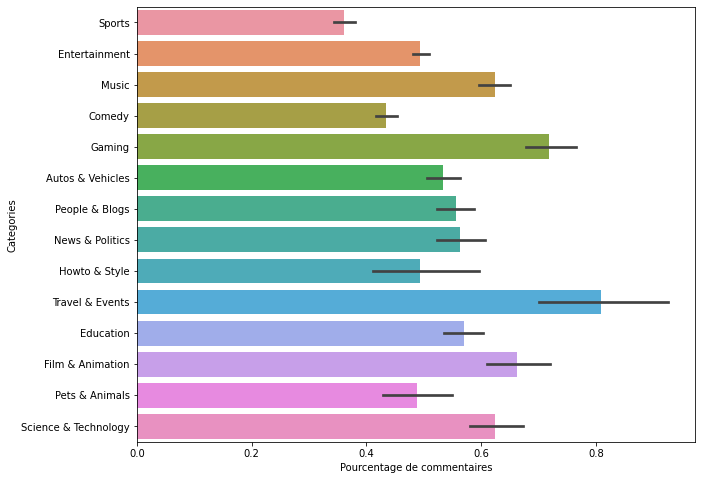

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'commentCountPercent', y = 'category', data = data)
plt.ylabel('Categories')
plt.xlabel('Pourcentage de commentaires');

Les catégories les plus commentés sont **Travel & Events**, **Gaming** et **Film & Animation**.

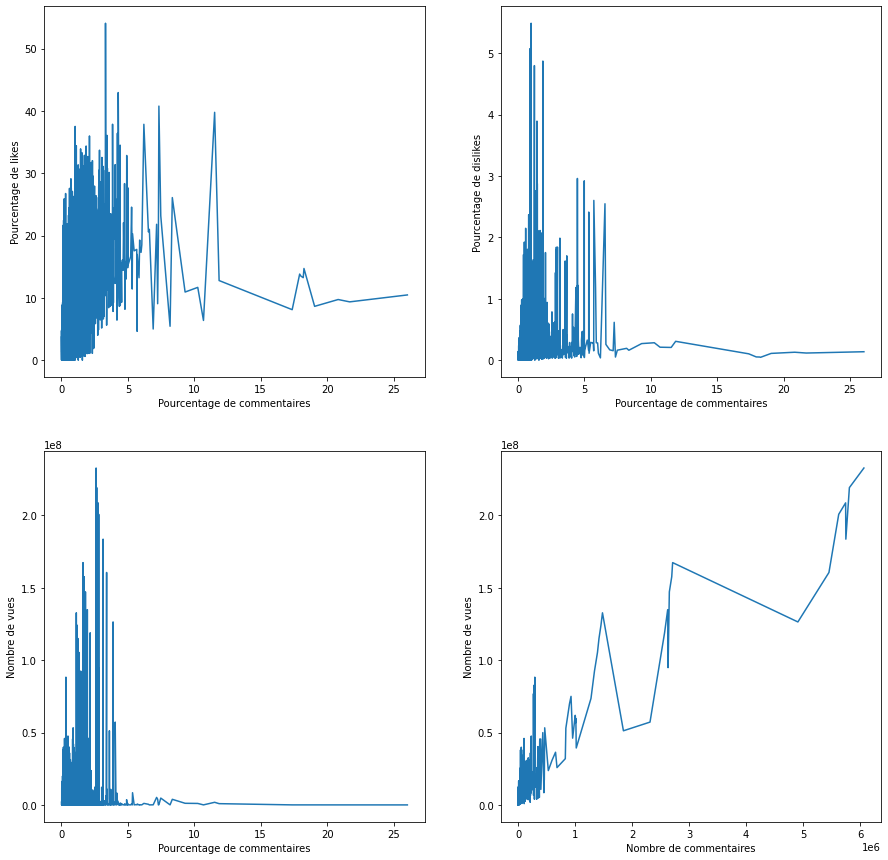

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.lineplot(x = 'commentCountPercent', y = 'likesPercent', data = data )
plt.ylabel('Pourcentage de likes')
plt.xlabel('Pourcentage de commentaires')
plt.subplot(222)
sns.lineplot(x = 'commentCountPercent', y = 'dislikesPercent', data = data )
plt.ylabel('Pourcentage de dislikes')
plt.xlabel('Pourcentage de commentaires')
plt.subplot(223)
sns.lineplot(x = 'commentCountPercent', y = 'view_count', data = data )
plt.ylabel('Nombre de vues')
plt.xlabel('Pourcentage de commentaires')
plt.subplot(224)
sns.lineplot(x = 'comment_count', y = 'view_count', data = data )
plt.ylabel('Nombre de vues')
plt.xlabel('Nombre de commentaires');

On peut constater que le nombre de commentaires n'est pas impacté par le taux de likes ou dislikes. Seulement par le nombre de vues.

## En conclusion

Un youtubeur souhaitant réussir devrais se lancer dans la catégorie **Musique**. Cependant, n'est pas musicien célèbre qui le veut. De plus, une grande majorité des vidéos concernant cette catégorie ne sont pas upload par l'ayant droit.

Il parraitrait plus sage de se lancer dans la catégorie **Gaming**. C'elle ci permet de profiter des droits d'auteur et de poster à un rythme soutenue. Mais attention au haters. Ce type de contenu en attire beaucoup. La catégorie **Gaming** ayant le 3ème plus mauvais ratio likes/dislikes parmis 14 catégories.

Une autre stratégie consisterait à choisir une catégorie de "niche" générant beaucoup d'engagement. Dans ce cadre **Pets & Animals**, **films & Animation** et **People & Blogs** semblent de très bon choix.
**Fims & Annimations** et **People & Blogs** en particulier, étant les deux possédant le plus haut de vues parmi les 3.